In [7]:
import os
import sys
CURR_DIR = os.path.abspath(os.path.dirname(''))
ROOT_DIR = os.path.join(CURR_DIR, "../../")
sys.path.append(ROOT_DIR)
import yaml
import numpy as np
import matplotlib.pyplot as plt
from routines.data_structurizer import DataStructurizer

with open("/Users/jandavidridder/Desktop/Masterarbeit/src/PYTHON/MYCODE/configs/etox_control_task.yaml", "r") as f:
    cfg = yaml.safe_load(f)
path = "/Users/jandavidridder/Desktop/Masterarbeit/src/experiments/001_certain_open_loop_kpis/2025-10-28/data/train"
structurizer = DataStructurizer(n_measurements=4, n_initial_measurements=128, time_horizon=3, state_keys=cfg["states"]["keys"], input_keys=cfg["inputs"]["all_keys"], tvp_keys=cfg["tvps"]["keys"])
data = structurizer.load_data(data_dir=path, num_trajectories=16)
data = structurizer.reduce_measurements(data, n_initial_measurements=128)
print("shape: ", data.shape)

print("last cols: ", repr(data[0, 512:520, :24]))

shape:  (16, 1023, 29)
last cols:  array([[0.70328705, 0.5157943 , 0.41612201, 0.35142447, 0.55147867,
        0.36998763, 0.27308458, 0.21081688, 0.24331368, 0.39570856,
        0.47655409, 0.52928405, 0.11513188, 0.18532761, 0.22298114,
        0.24691629, 0.37346521, 0.44366095, 0.48131447, 0.50524962,
        1.03292137, 1.02413874, 1.00714362, 1.01256346],
       [0.70331119, 0.51567642, 0.41831416, 0.3476589 , 0.55150264,
        0.36986308, 0.27529354, 0.2067681 , 0.24329429, 0.3958002 ,
        0.47480709, 0.53218323, 0.11512236, 0.1853801 , 0.22209083,
        0.24864908, 0.3734557 , 0.44371344, 0.48042416, 0.50698242,
        1.03280383, 1.02388955, 1.00408013, 1.01270865],
       [0.7034056 , 0.5156864 , 0.42062865, 0.34485372, 0.55159637,
        0.36986794, 0.27762122, 0.20371968, 0.2432185 , 0.39579016,
        0.47296078, 0.53433007, 0.11508515, 0.18538021, 0.22115448,
        0.24996575, 0.37341848, 0.44371354, 0.47948781, 0.50829908,
        1.03257015, 1.02357492, 1.0

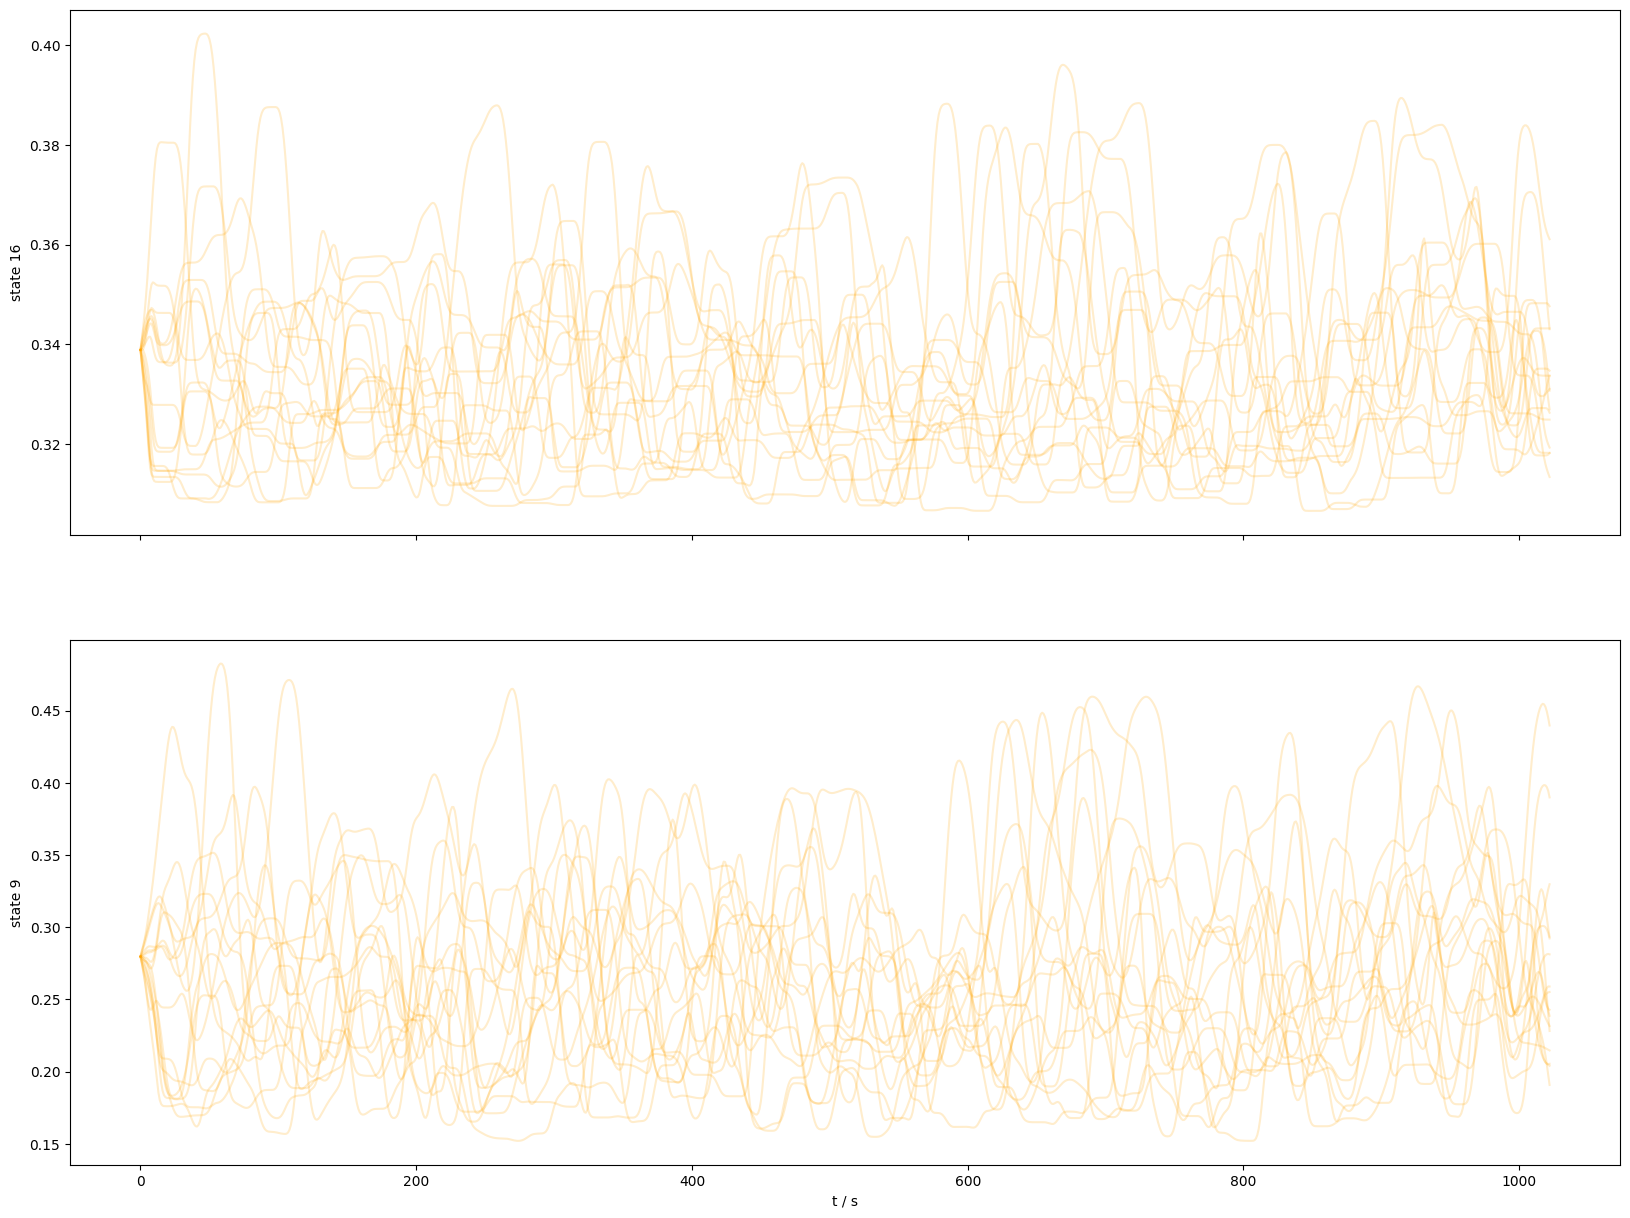

In [38]:
inputs = structurizer.get_inputs_from_data(data,)

positions = np.random.rand(2) * data.shape[-1]
positions = positions.astype(int)
fig, ax = plt.subplots(2, 1, figsize=(20, 15), sharex=True)
for sc in range(data.shape[0]):
    ax[0].plot(data[sc, :, positions[0]], label=f'scenario {sc + 1}', c="orange", alpha=0.2)
    ax[1].plot(data[sc, :, positions[1]], label=f'scenario {sc + 1}', c="orange", alpha=0.2)   
    # ax[2].plot(inputs[sc, :, 0], label=f'scenario {sc + 1}', alpha=0.1)   
    # ax[2].plot(inputs[sc, :, 1], label=f'scenario {sc + 1}', alpha=0.1)   
    # ax[3].plot(inputs[sc, :, 2], label=f'scenario {sc + 1}', alpha=0.1)   
    # ax[3].plot(inputs[sc, :, 3], label=f'scenario {sc + 1}', alpha=0.1)   
    # ax[3].plot(inputs[sc, :, 4], label=f'scenario {sc + 1}', alpha=0.1)   
ax[0].set_ylabel(f'state {positions[0]}')
ax[1].set_ylabel(f'state {positions[1]}')
ax[-1].set_xlabel('t / s')


plt.show()